Text(0.5, 1.0, 'Petal')

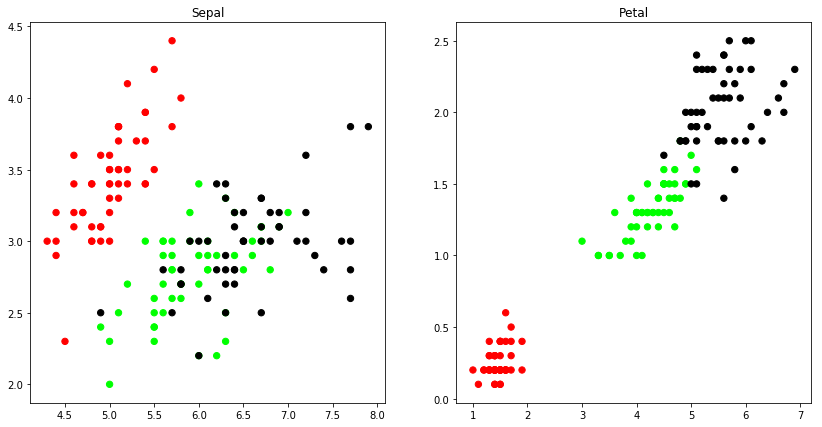

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline
# import some data to play with
iris=datasets.load_iris()
# Store the inputs as a Pandas Dataframe and set the column names
X=pd.DataFrame(iris.data)
#print(X)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
#print(X.columns)#print("X:",x)#print("Y:",y)
y=pd.DataFrame(iris.target)
y.columns=['Targets']
# Set the size of the plot
plt.figure(figsize=(14,7))
# Create a colormap
colormap=np.array(['red','lime','black'])
# Plot Sepal
plt.subplot(1,2,1)
plt.scatter(X.Sepal_Length,X.Sepal_Width,c=colormap[y.Targets],s=40)
plt.title('Sepal')
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Petal')

Text(0.5, 1.0, 'K Mean Classification')

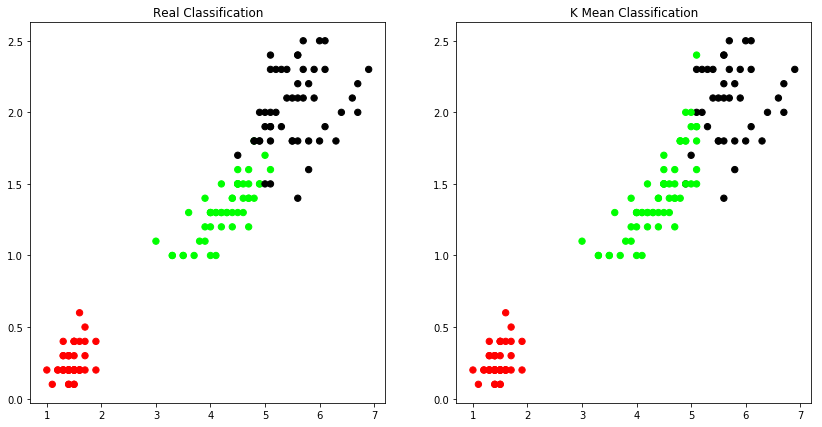

In [2]:
# K Means Cluster
model=KMeans(n_clusters=3)
model.fit(X)
model.labels_
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
# Create a colormap
colormap=np.array(['red','lime','black'])
# Plot the Original Classifications
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real Classification')
# Plot the Models Classifications
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title('K Mean Classification')

In [3]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
print(predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5, 1.0, 'K Mean Classification')

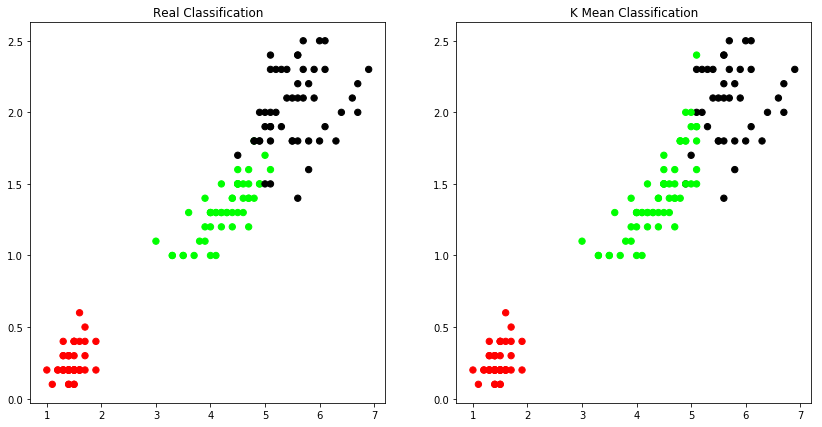

In [4]:
#Re-plot
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
# Create a colormap
colormap=np.array(['red','lime','black'])
# Plot Orginal
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real Classification')
# Plot Predicted with corrected values
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('K Mean Classification')

In [5]:
#Accuracy
sm.accuracy_score(y,model.labels_)

0.8933333333333333

In [6]:
# Confusion Matrix
sm.confusion_matrix(y,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

Text(0.5, 1.0, 'K Mean Classification')

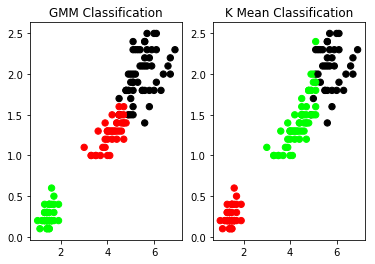

In [8]:
#GMM for EM
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
xs.sample(5)
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,means_init=None, n_components=3, n_init=1, precisions_init=None,random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,verbose_interval=10, warm_start=False, weights_init=None)
y_cluster_gmm=gmm.predict(xs)
y_cluster_gmm
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('K Mean Classification')

In [9]:
sm.accuracy_score(y,y_cluster_gmm)

0.3333333333333333

In [10]:
# Confusion Matrix
sm.confusion_matrix(y,y_cluster_gmm)

array([[ 0, 50,  0],
       [45,  0,  5],
       [ 0,  0, 50]], dtype=int64)